📄 Dokumen: artificial-intelligence-modern-approach.txt

🔹 Sebelum preprocessing:
 Judul: Artificial Intelligence: A Modern Approach
Penulis: Stuart Russell, Peter Norvig
Genre: Kecerdasan Buatan, Komputasi
Penerbit: Pearson Education, 2021
Kata Kunci: AI, Machine Learning, Artificial Intelligence
Isi:
Artificial Intelligence (AI) adalah bidang ilmu komputer yang berfokus pada pem ...

🔹 Sesudah preprocessing:
 judul artificial intelligence modern approach tulis stuart russell peter norvig genre cerdas buat komputasi terbit pearson education kata kunci ai machine learning artificial intelligence isi artificial intelligence ai bidang ilmu komputer fokus buat sistem pikir ajar tindak cara cerdas seperti manusia buku jelas fondasi teoretis praktis ai cara dalam beberapa ...
📄 Dokumen: deep-learning-with-python.txt

🔹 Sebelum preprocessing:
 Judul: Deep Learning with Python
Penulis: François Chollet
Genre: Teknologi, Kecerdasan Buatan
Penerbit: Manning Publications, 2017
Kata Kunci: kecerda

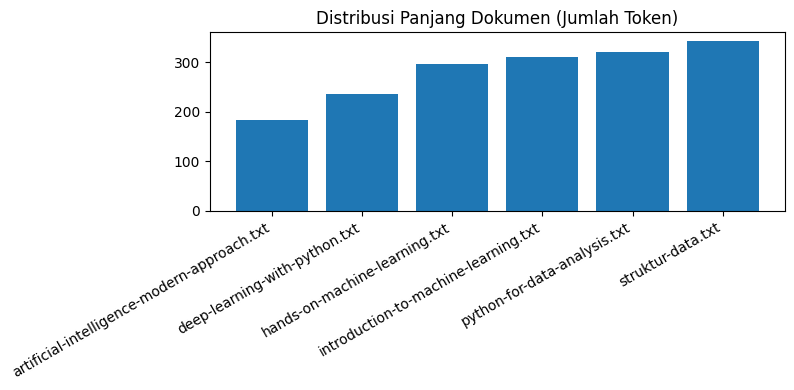

In [1]:
# Soal 02
import sys, os
sys.path.append(os.path.abspath("../"))
from src.preprocess import preprocess_text, DOCS_DIR, PROC_DIR, run_all

# --- Tampilkan Before-After untuk 2 dokumen ---
sample_files = list(DOCS_DIR.glob("*.txt"))[:2]

for f in sample_files:
    raw = f.read_text(encoding="utf-8", errors="ignore")
    processed_tokens = preprocess_text(raw)
    print("="*80)
    print(f"📄 Dokumen: {f.name}")
    print("\n🔹 Sebelum preprocessing:\n", raw[:300], "...")
    print("\n🔹 Sesudah preprocessing:\n", " ".join(processed_tokens[:50]), "...")
    print("="*80)

# --- Run untuk semua dokumen dan buat log ---
run_all(plot=True)

# --- hasil tersimpan ---
print("\nDaftar hasil di data/processed:")
for f in os.listdir(PROC_DIR):
    print("-", f)


In [2]:
# Soal 03
# Import fungsi dari modul
from src.boolean_ir import load_processed, build_vocabulary, build_inverted_index, explain, evaluate_boolean_goldset

# Muat dokumen hasil preprocessing
docs, files = load_processed()
vocab, t2i = build_vocabulary(docs)
inv = build_inverted_index(docs)

tests = [
    "python AND data",
    "AI OR machine",
    "NOT AI",
    "deep AND (learning OR network)"
]

for q in tests:
    res, exp = explain(q, inv)
    # print(f"\n=== Query: {q} ===")
    # print("Hasil dokumen:", [files[i] for i in sorted(res)])
    # print("Penjelasan:", exp)

goldsets = {
    "python AND data": [
        "deep-learning-with-python.txt",
        "struktur-data.txt",
        "python-for-data-analysis.txt"
    ],
    "AI OR machine": [
        "introduction-to-machine-learning.txt",
        "hands-on-machine-learning.txt",
        "artificial-intelligence-modern-approach.txt"
    ],
    "NOT AI": [
        "struktur-data.txt"
    ]
}

# Evaluasi precision dan recall terhadap goldset
evaluate_boolean_goldset(inv, files, goldsets)



=== Evaluasi Mini Truth Set ===

Query: python AND data
Predicted: ['deep-learning-with-python.txt', 'hands-on-machine-learning.txt', 'python-for-data-analysis.txt', 'struktur-data.txt']
Gold: ['deep-learning-with-python.txt', 'struktur-data.txt', 'python-for-data-analysis.txt']
Precision = 0.75, Recall = 1.00

Query: AI OR machine
Predicted: ['artificial-intelligence-modern-approach.txt', 'deep-learning-with-python.txt', 'hands-on-machine-learning.txt', 'introduction-to-machine-learning.txt', 'python-for-data-analysis.txt']
Gold: ['introduction-to-machine-learning.txt', 'hands-on-machine-learning.txt', 'artificial-intelligence-modern-approach.txt']
Precision = 0.60, Recall = 1.00

Query: NOT AI
Predicted: ['hands-on-machine-learning.txt', 'python-for-data-analysis.txt', 'struktur-data.txt']
Gold: ['struktur-data.txt']
Precision = 0.33, Recall = 1.00

Rata-rata Precision = 0.56, Recall = 1.00


[{'Query': 'python AND data',
  'Predicted': ['deep-learning-with-python.txt',
   'hands-on-machine-learning.txt',
   'python-for-data-analysis.txt',
   'struktur-data.txt'],
  'Gold': ['deep-learning-with-python.txt',
   'struktur-data.txt',
   'python-for-data-analysis.txt'],
  'Precision': 0.75,
  'Recall': 1.0},
 {'Query': 'AI OR machine',
  'Predicted': ['artificial-intelligence-modern-approach.txt',
   'deep-learning-with-python.txt',
   'hands-on-machine-learning.txt',
   'introduction-to-machine-learning.txt',
   'python-for-data-analysis.txt'],
  'Gold': ['introduction-to-machine-learning.txt',
   'hands-on-machine-learning.txt',
   'artificial-intelligence-modern-approach.txt'],
  'Precision': 0.6,
  'Recall': 1.0},
 {'Query': 'NOT AI',
  'Predicted': ['hands-on-machine-learning.txt',
   'python-for-data-analysis.txt',
   'struktur-data.txt'],
  'Gold': ['struktur-data.txt'],
  'Precision': 0.33,
  'Recall': 1.0}]

In [3]:
# Soal 04
# --- Import fungsi dari vsm_ir.py ---
from src.vsm_ir import (
    load_processed,
    build_term_stats,
    tfidf_matrix,
    search,
    evaluate_vsm_results
)

# --- Muat dokumen hasil preprocessing ---
docs, names = load_processed()
print(f"Jumlah dokumen: {len(docs)}")
print("Contoh dokumen:", names[:5])

# --- TF-IDF Matrix ---
vocab, t2i, TF, DF, lens, avg_len = build_term_stats(docs)
TFIDF, idf = tfidf_matrix(TF, DF, len(docs))
print(f"Vocab size: {len(vocab)}")
print("TF-IDF matrix shape:", TFIDF.shape)

# --- Uji Query Manual ---
queries = [
    "python data",
    "AI machine",
    "deep learning network"
]

for q in queries:
    print(f"\n=== Query: {q} ===")
    results = search(q, TFIDF, t2i, idf, names, top_k=3)
    for name, score, _ in results:
        snippet = " ".join(docs[names.index(name)].split()[:20])
        print(f"- {name} ({score:.3f}) → {snippet[:100]}...")


# --- Evaluasi Wajib (Mini Gold Set) ---
goldsets = {
    "python AND data": [
        "deep-learning-with-python.txt",
        "struktur-data.txt",
        "python-for-data-analysis.txt"
    ],
    "AI OR machine": [
        "introduction-to-machine-learning.txt",
        "hands-on-machine-learning.txt",
        "artificial-intelligence-modern-approach.txt"
    ],
    "NOT AI": [
        "struktur-data.txt"
    ]
}

evaluate_vsm_results(TFIDF, t2i, idf, docs, names, goldsets, k=3)

Jumlah dokumen: 7
Contoh dokumen: ['artificial-intelligence-modern-approach.txt', 'deep-learning-with-python.txt', 'hands-on-machine-learning.txt', 'introduction-to-machine-learning.txt', 'preprocess_log.txt']
Vocab size: 590
TF-IDF matrix shape: (7, 590)

=== Query: python data ===
- python-for-data-analysis.txt (0.505) → judul python for data analysis tulis wes mckinney genre data science pemrograman analisis data terbi...
- struktur-data.txt (0.361) → judul struktur data algoritma python tulis michael goodrich roberto tamassia michael goldwasser genr...
- deep-learning-with-python.txt (0.169) → judul deep learning with python tulis fran ois chollet genre teknologi cerdas buat terbit manning pu...

=== Query: AI machine ===
- hands-on-machine-learning.txt (0.214) → judul hands on machine learning with scikit learn keras and tensorflow tulis aur lien ron genre mach...
- introduction-to-machine-learning.txt (0.135) → judul introduction to machine learning tulis ethem alpaydin genre aja

{'precision': np.float64(0.7777777777777778),
 'recall': np.float64(1.0),
 'map': np.float64(1.0)}

[OK] Imported vsm_ir from ../src/
Loaded 7 docs
Vocab size: 590
TF-IDF matrices built (linear & sublinear)
Loaded goldsets from ../data/goldsets.json


## Ringkasan metrik per skema

,Precision@k,Recall,F1,MAP@k,nDCG@k
scheme,,,,,
normal,0.466667,1.0,0.611111,1.0,1.0
sublinear,0.466667,1.0,0.611111,1.0,1.0


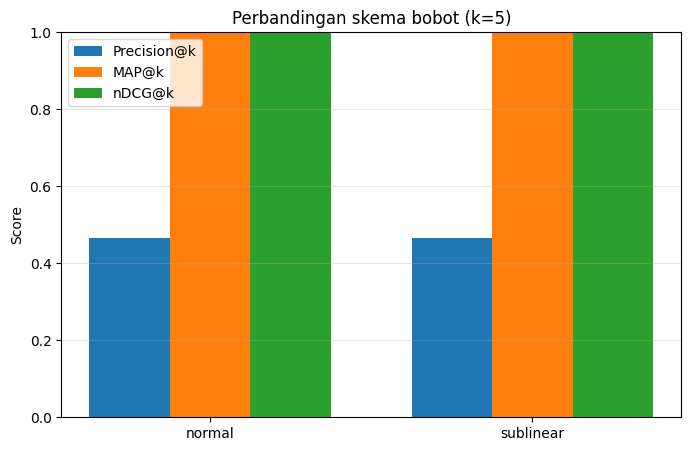

## RAG Mini

**Q:** python AND data


**Top-3 Docs:** ['python-for-data-analysis.txt', 'struktur-data.txt', 'deep-learning-with-python.txt']


**Snippet:** judul python for data analysis tulis wes mckinney genre data science pemrograman analisis data terbit reilly media kata kunci python analisis data data isi buku python for data analysis karya wes mckinney rupa pandu komprehensif paham terap teknik analisis data guna python cipta pustaka pandas wes mckinney beri landas teoretis praktis dalam kelola bersih analis data dalam bagai format topik utama bahas cakup konsep dasar pemrograman data python buku jelas konsep dasar python relevan analisis data seperti struktur data list tuple dictionary kontrol alur program fungsi baca kenal praktik pemrograman efisien kerja data dalam jumlah besar antar numpy struktur data array numpy jadi fondasi bagi bagi besar operasi numerik python buku bahas operasi vektor matriks broadcasting manipulasi dimensi hitung statistik guna numpy arrays mungkin komputasi cepat efisien manipulasi data pandas inti buku bahas tentang pustaka pandas liput series dataframe indexing merging reshaping agregasi data jelas pula cara impor data bagai format seperti csv excel json database sql bersih transformasi data data wrangling mckinney tekan penting proses data cleaning seperti tangan nilai hilang missing values deteksi anomali transformasi tipe data teknik jadi langkah penting belum analisis statistik model laku visualisasi data matplotlib pandas buku beri pandu tentang cara buat grafik visualisasi interaktif eksplorasi data baca ajar bagaimana ubah data mentah jadi wawas visual lalu histogram scatter plot time series plot heatmap analisis statistik time series serta bahas dasar statistik deskriptif analisis time series paham tren data dasar waktu masuk teknik resampling rolling statistics olah data temporal pustaka pandas praktik baik dalam analisis data modern mckinney jelas dekat efisien dalam tangan dataset besar vectorized operations memory optimization integrasi pustaka lain seperti scikit learn machine learning buku sorot penting dokumentasi reproducibility dalam proyek analisis data buku jadi sumber referensi penting bagi mahasiswa analis data teliti profesional ingin kuasa analisis data guna ekosistem python modern kombinasi teori contoh nyata baca paham alur kerja end to end mulai kumpul data transformasi analisis hingga visualisasi hasil.

**Q:** AI OR machine


**Top-3 Docs:** ['hands-on-machine-learning.txt', 'introduction-to-machine-learning.txt', 'artificial-intelligence-modern-approach.txt']


**Snippet:** judul hands on machine learning with scikit learn keras and tensorflow tulis aur lien ron genre machine learning data science pemrograman terbit reilly media kata kunci machine learning keras tensorflow neural network isi buku beri pandu komprehensif praktis paham implementasi algoritma machine learning guna python tulis aur lien ron jelas konsep teoretis terap langsung guna dua pustaka populer scikit learn model tradisional tensorflow keras deep learning topik utama bahas liput konsep dasar machine learning jelas konsep supervised unsupervised learning masuk penting dataset bagi data train test proses validasi model buku bahas konsep bias variance tradeoff evaluasi model guna metrik seperti akurasi precision recall score model supervised learning bahas algoritma seperti linear regression logistic regression decision tree random forest support vector machine svm jelas pula bagaimana model kerja lebih kurang cara sesuai hyperparameter hasil optimal model unsupervised learning cakup teknik clustering seperti means dbscan dimensionality reduction seperti pca buku tekan bagaimana teknik guna eksplorasi data deteksi anomali visualisasi pipeline preprocessing data buku kenal konsep pipeline scikit learn mudah proses preprocessing seperti normalisasi encoding imputasi data hilang baca ajar buat alur kerja otomatis efisien reproduksi neural networks deep learning kenal konsep dasar jaring saraf tiru arsitektur feedforward convolutional neural networks cnn recurrent neural networks rnn bagi jelas cara bangun latih model deep learning guna tensorflow keras api teknik lanjut produksi model buku bahas teknik optimasi seperti regularisasi early stopping learning rate scheduling lengkap pula pandu terap model dalam sistem produksi deployment guna tensorflow serving tensorflow lite proyek studi kasus nyata bab sedia proyek bas dunia nyata misal prediksi harga rumah klasifikasi gambar analisis sentimen tuju agar baca hanya paham teori tetapi implementasi machine learning cara praktis dekat interaktif bas eksperimen buku jadi referensi penting bagi siapa pun ingin kuasa machine learning modern cara seluruh mulai dasar hingga terap profesional.

**Q:** NOT AI


**Top-3 Docs:** ['struktur-data.txt', 'python-for-data-analysis.txt', 'preprocess_log.txt']


**Snippet:** judul struktur data algoritma python tulis michael goodrich roberto tamassia michael goldwasser genre ilmu komputer algoritma pemrograman terbit wiley kata kunci data struktur data python algoritma isi buku struktur data algoritma python rupa pandu komprehensif bahas konsep fundamental dalam organisasi pemrosesan data cara efisien guna bahasa python buku gabung teori struktur data klasik dekat implementatif bas kode jadi sumber utama bagi mahasiswa kembang perangkat lunak topik utama bahas cakup konsep dasar struktur data buku jelas definisi struktur data hubung antara kompleksitas waktu ruang penting pilih struktur data tepat dalam selesai masalah komputasi kenal notasi big alat analis efisiensi algoritma tipe data abstrak abstract data type adt bahas bagaimana adt representasi perilaku logis struktur data tanpa perhati implementasi internal contoh adt bahas liput stack queue list deque serta operasi dasar seperti push pop enqueue dequeue struktur data linear buku bahas array linked list singly doubly linked list cara implementasi python struktur lengkap analisis kompleksitas operasi sisip hapus cari elemen struktur data non linear bahas liput tree graph guna representasi hubung hierarkis jaring kompleks masuk implementasi binary search tree bst heap avl tree graph traversal algorithms seperti depth first search dfs breadth first search bfs algoritma cari urut searching sorting buku jelas bagai algoritma penting seperti linear search binary search selection sort insertion sort merge sort quick sort analisis banding kompleksitas algoritma bantu baca paham performa bagai ukur data hashing struktur data asosiatif kenal konsep hash table dictionary struktur data efisien cari cepat bahas liput fungsi hash tangan collision terap dictionary python bas open addressing rekurs analisis kompleksitas buku tekan guna rekurs dalam selesai masalah seperti tree traversal vide and conquer algorithms beri dekat sistematis analis kompleksitas algoritma rekursif guna relasi rekurs aplikasi struktur data dalam dunia nyata saji contoh terap struktur data bagai bidang seperti sistem manajemen basis data kompresi data jaring komputer pemrosesan graf buku tekan prinsip desain algoritma efisien skala saji sistematis ilustrasi visual contoh implementasi langsung dalam python buku bantu baca paham hubung erat antara teori praktik baca hanya ajar cara guna struktur data tetapi mengapa kapan struktur sebut optimal guna.

In [4]:
# ========== SOAL 05 ==========
import sys, os, math, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

sys.path.append("..")

try:
    from src.vsm_ir import load_processed, build_term_stats, tfidf_matrix, search
    print("[OK] Imported vsm_ir from ../src/")
except Exception as e:
    print("[ERROR] Gagal import dari ../src/:", e)
    raise

# ---------------------------
# 1) Metric utilities
# ---------------------------
def precision_recall_f1_from_sets(pred_list, gold_set):
    pred = list(pred_list)
    gold = set(gold_set)
    tp = len([d for d in pred if d in gold])
    precision = tp / len(pred) if pred else 0.0
    recall = tp / len(gold) if gold else 0.0
    f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0.0
    return precision, recall, f1

def average_precision(pred, gold, k):
    hits = 0.0
    s = 0.0
    for i, d in enumerate(pred[:k], start=1):
        if d in gold:
            hits += 1
            s += hits / i
    return s / max(1, len(gold))

def ndcg_at_k(pred, gold, k):
    def dcg(rel_list):
        return sum((rel / math.log2(i + 2)) for i, rel in enumerate(rel_list))
    rels = [1 if d in gold else 0 for d in pred[:k]]
    ideal = sorted(rels, reverse=True)
    idcg = dcg(ideal)
    return dcg(rels) / idcg if idcg > 0 else 0.0

# ---------------------------
# 2) Load processed docs
# ---------------------------
docs, names = load_processed()
print(f"Loaded {len(docs)} docs")

# build TF/DF
res = build_term_stats(docs)
if len(res) == 4:
    vocab, t2i, TF, DF = res
    lens, avg_len = None, None
elif len(res) >= 6:
    vocab, t2i, TF, DF, lens, avg_len = res[:6]
else:
    raise RuntimeError("Unexpected return from build_term_stats")

N = len(docs)
print("Vocab size:", len(vocab))

# build TF-IDF (2 skema)
TFIDF_linear, idf_linear = tfidf_matrix(TF, DF, N, sublinear=False)
TFIDF_sub, idf_sub = tfidf_matrix(TF, DF, N, sublinear=True)
print("TF-IDF matrices built (linear & sublinear)")

# ---------------------------
# 3) Load goldsets
# ---------------------------
gold_path = "../data/goldsets.json"
if os.path.exists(gold_path):
    with open(gold_path, "r", encoding="utf-8") as f:
        goldsets = json.load(f)
    print(f"Loaded goldsets from {gold_path}")
else:
    goldsets = {
        "python AND data": ["deep-learning-with-python.txt","struktur-data.txt","python-for-data-analysis.txt"],
        "AI OR machine": ["introduction-to-machine-learning.txt","hands-on-machine-learning.txt","artificial-intelligence-modern-approach.txt"],
        "NOT AI": ["struktur-data.txt"]
    }
    print("Using inline goldsets")

# ---------------------------
# 4) Retrieval wrapper
# ---------------------------
def retrieve_for_scheme(query, scheme="normal", top_k=5):
    q_clean = query.replace("AND","").replace("OR","").replace("NOT","").replace("(", "").replace(")", "")
    q_clean = " ".join(q_clean.split())
    if scheme == "sublinear":
        results = search(q_clean, TFIDF=TFIDF_sub, t2i=t2i, idf=idf_sub, names=names, docs=docs, top_k=top_k)
    else:
        results = search(q_clean, TFIDF=TFIDF_linear, t2i=t2i, idf=idf_linear, names=names, docs=docs, top_k=top_k)
    docs_order = [r[0] for r in results]
    return docs_order, results

# ---------------------------
# 5) Evaluate schemes
# ---------------------------
schemes = ["normal", "sublinear"]
k = 5
summary = []
per_query_details = []

for scheme in schemes:
    precisions, recalls, f1s, aps, ndcgs = [], [], [], [], []
    for query, gold in goldsets.items():
        pred_names, raw = retrieve_for_scheme(query, scheme, k)
        p, r, f1 = precision_recall_f1_from_sets(pred_names, gold)
        ap = average_precision(pred_names, gold, k)
        ndcg = ndcg_at_k(pred_names, gold, k)
        precisions.append(p); recalls.append(r); f1s.append(f1); aps.append(ap); ndcgs.append(ndcg)
        per_query_details.append({
            "scheme": scheme, "query": query,
            "precision": p, "recall": r, "f1": f1, "ap": ap, "ndcg": ndcg,
            "predicted_topk": pred_names
        })
    summary.append({
        "scheme": scheme,
        "Precision@k": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1": np.mean(f1s),
        "MAP@k": np.mean(aps),
        "nDCG@k": np.mean(ndcgs)
    })

df_summary = pd.DataFrame(summary).set_index("scheme")
display(Markdown("## Ringkasan metrik per skema"))
display(df_summary)

# ---------------------------
# 6) Plot comparison
# ---------------------------
labels = df_summary.index.tolist()
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width, df_summary["Precision@k"], width, label="Precision@k")
ax.bar(x, df_summary["MAP@k"], width, label="MAP@k")
ax.bar(x + width, df_summary["nDCG@k"], width, label="nDCG@k")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Score")
ax.set_title(f"Perbandingan skema bobot (k={k})")
ax.legend()
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# ---------------------------
# 7) RAG mini (template-based)
# ---------------------------
display(Markdown("## RAG Mini"))
for q in list(goldsets.keys())[:3]:
    pred_names, raw = retrieve_for_scheme(q, scheme="normal", top_k=3)
    idx = raw[0][2] if raw else None
    snippet = ""
    if idx is not None and idx >= 0:
        text = docs[idx]
        sents = text.split(".")
        snippet = ". ".join(s.strip() for s in sents[:2]) + "."
    display(Markdown(f"**Q:** {q}\n\n\n**Top-3 Docs:** {pred_names}\n\n\n**Snippet:** {snippet}"))


